In [12]:
import sys
import os
import mlflow
import mlflow.sklearn


from pathlib import Path

# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
# sys.path.append(str(Path.cwd().parent))

experiment_name = 'CNN_Model_Training_Experiment'

mlflow_dir = "./mlruns"

mlflow_dir = Path(mlflow_dir)

if not os.path.exists(mlflow_dir):
    os.makedirs(mlflow_dir)


# mlflow.set_tracking_uri(f"file://{os.path.abspath(mlflow_dir)}")

mlflow.set_tracking_uri("sqlite:///mlflow.db")

mlflow.set_experiment(experiment_name)


mlflow.autolog()
mlflow.sklearn.autolog(log_models=True, log_datasets=True)

2026/02/21 23:14:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2026/02/21 23:14:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


In [13]:
import numpy as np 
import pandas as pd 
import zipfile
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers
from keras.models import Sequential

from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, Model

# Load VGG16 without the top classification layer
base_model = VGG16(weights=None, input_shape=(224, 224, 1), include_top=False)

# Add your own custom head
x = layers.Flatten()(base_model.output)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(4096, activation='relu')(x)
predictions = layers.Dense(1000, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,356,392 (527.79 MB)

 Trainable params: 138,356,392 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.utils import load_img, img_to_array

# Updated paths (Ensure these match your local environment)
imgs = [
    "./DataFiles/train/cat.11679.jpg",
    "./DataFiles/train/cat.10679.jpg",
    "./DataFiles/train/dog.2811.jpg",
    "./DataFiles/train/dog.2011.jpg",
]

def _load_image(img_path):
    # Modern Keras uses utils.load_img and utils.img_to_array
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return preprocess_input(img)

def _get_predictions(_model):
    # Display Original Images
    fig1, axes1 = plt.subplots(1, 4, figsize=(20, 5))
    for i in range(4):
        # Use Image.Resampling.LANCZOS (ANTIALIAS is deprecated)
        raw_img = Image.open(imgs[i]).resize((200, 200), Image.Resampling.LANCZOS)
        axes1[i].imshow(raw_img)
        axes1[i].axis('off')
    plt.show()
    
    # Display Prediction Bar Charts
    fig2, axes2 = plt.subplots(1, 4, figsize=(25, 10))
    for i, img_path in enumerate(imgs):
        img_tensor = _load_image(img_path)
        preds = decode_predictions(_model.predict(img_tensor, verbose=0), top=3)[0]
        
        # Extract labels and confidence scores
        labels = [p[1] for p in preds]
        confidences = [p[2] for p in preds]
        
        sns.barplot(x=confidences, y=labels, color="skyblue", ax=axes2[i])
        axes2[i].set_title(f"Prediction {i+1}", fontsize=15)
        axes2[i].tick_params(labelsize=12)
        
    plt.tight_layout()
    plt.show()

# Example usage:
# model = VGG16(weights='imagenet')
# _get_predictions(model)

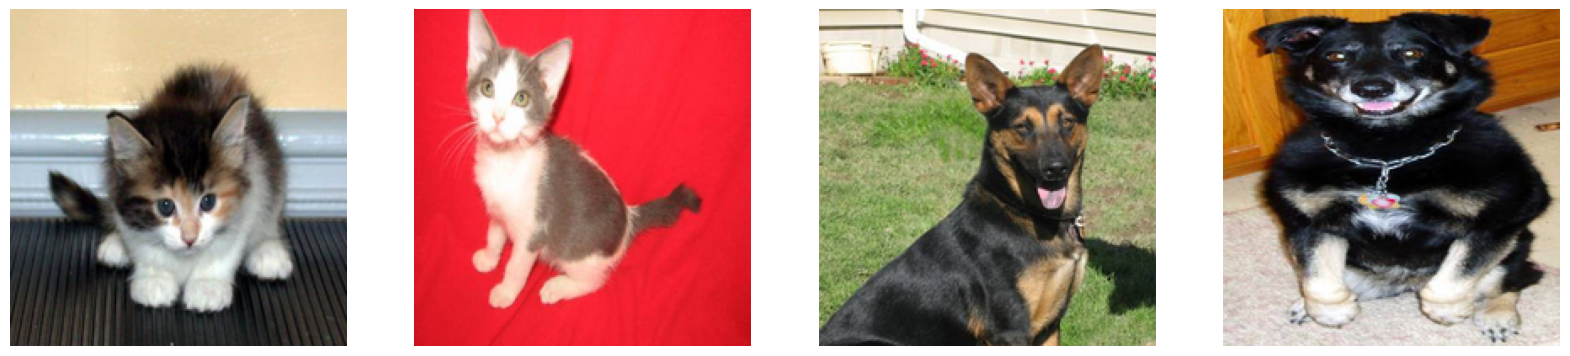

ValueError: Exception encountered when calling Functional.call().

[1mInput 0 with name 'None' of layer 'block1_conv1' is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (1, 224, 224, 3)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(1, 224, 224, 3), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

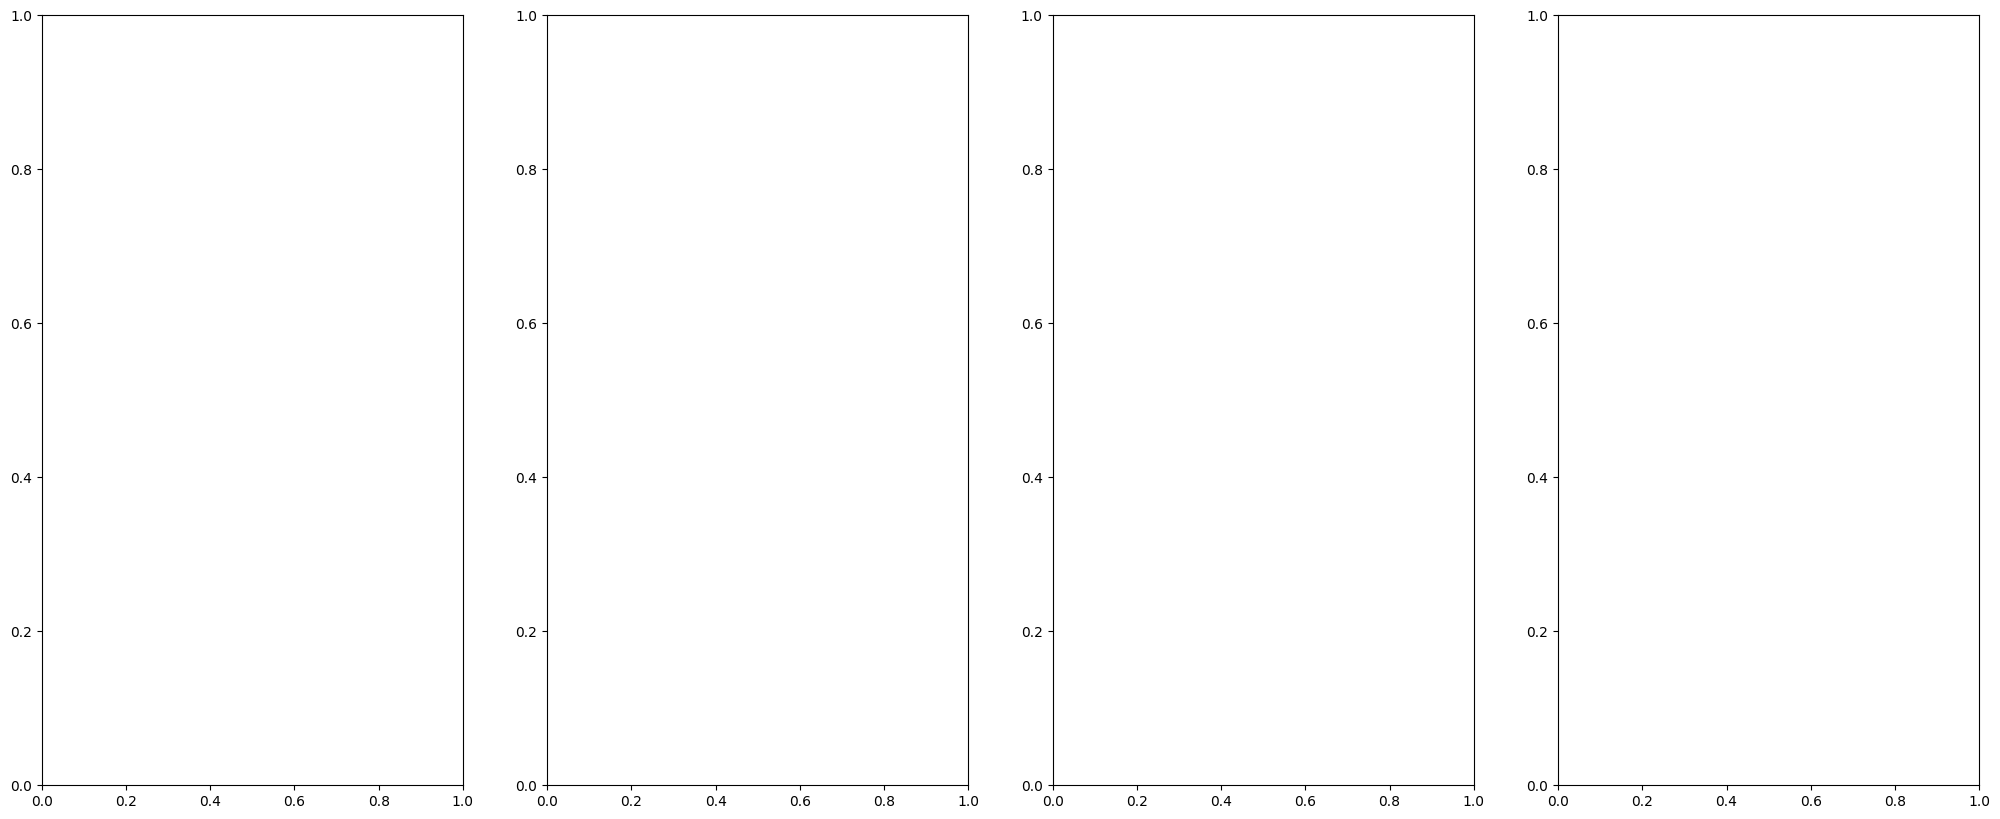

In [40]:
_get_predictions(model)

In [14]:
def plot_loss_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()


In [26]:
TRAIN_FOLDER = "./DataFiles/SampleFiles/train/"
TEST_FOLDER =  "./DataFiles/SampleFiles/test/"

# train_image_list = os.listdir(train_image_path)[0:SAMPLE_SIZE]
train_image_list = os.listdir(TRAIN_FOLDER)
test_image_list = os.listdir(TEST_FOLDER)

print(len(train_image_list))
print(len(test_image_list))


82
40


## CNN

In [27]:
import os
os.environ['XLA_FLAGS'] = '--xla_gpu_cuda_data_dir=/usr/local/cuda'

In [28]:
from keras import layers, models, optimizers

model = models.Sequential([
    # 1. Explicit Input layer replaces input_shape argument
    layers.Input(shape=(150, 150, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

In [29]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
# --------------------------------------
train_generator = train_datagen.flow_from_directory(
        TRAIN_FOLDER,  
        target_size=(150, 150),  
        batch_size=100,
        class_mode='binary')

# --------------------------------------
validation_generator = validation_datagen.flow_from_directory(
        TEST_FOLDER,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [32]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,  # 20000 train images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=100  # 5000 validation images = batch_size * steps
)

AttributeError: 'Sequential' object has no attribute 'fit_generator'